In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline 


In [96]:
frames = [df_low.iloc[0:3500:],df_31310.iloc[3500::]]


df = pd.concat(frames)

In [93]:
# weighted = weighted*.98

In [98]:
sample = pd.read_csv('../submissions/sample_submission.csv', index_col=False)

In [6]:
df_31310 = pd.read_csv('./31310.csv', index_col='id')
df_32788 = pd.read_csv('./32788.csv', index_col='id')
df_33243 = pd.read_csv('./33243.csv', index_col='id')
df_33314 = pd.read_csv('./33314.csv', index_col='id')
df_39142 = pd.read_csv('./39142.csv', index_col='id')
df_48317 = pd.read_csv('./48317.csv', index_col='id')
df_low = pd.read_csv('./xgboost_lowsplit_053017.csv', index_col='id')
df_no = pd.read_csv('./xgboost_nosplit_053017.csv', index_col='id')

In [25]:
sns.s

TypeError: 'dict' object is not callable

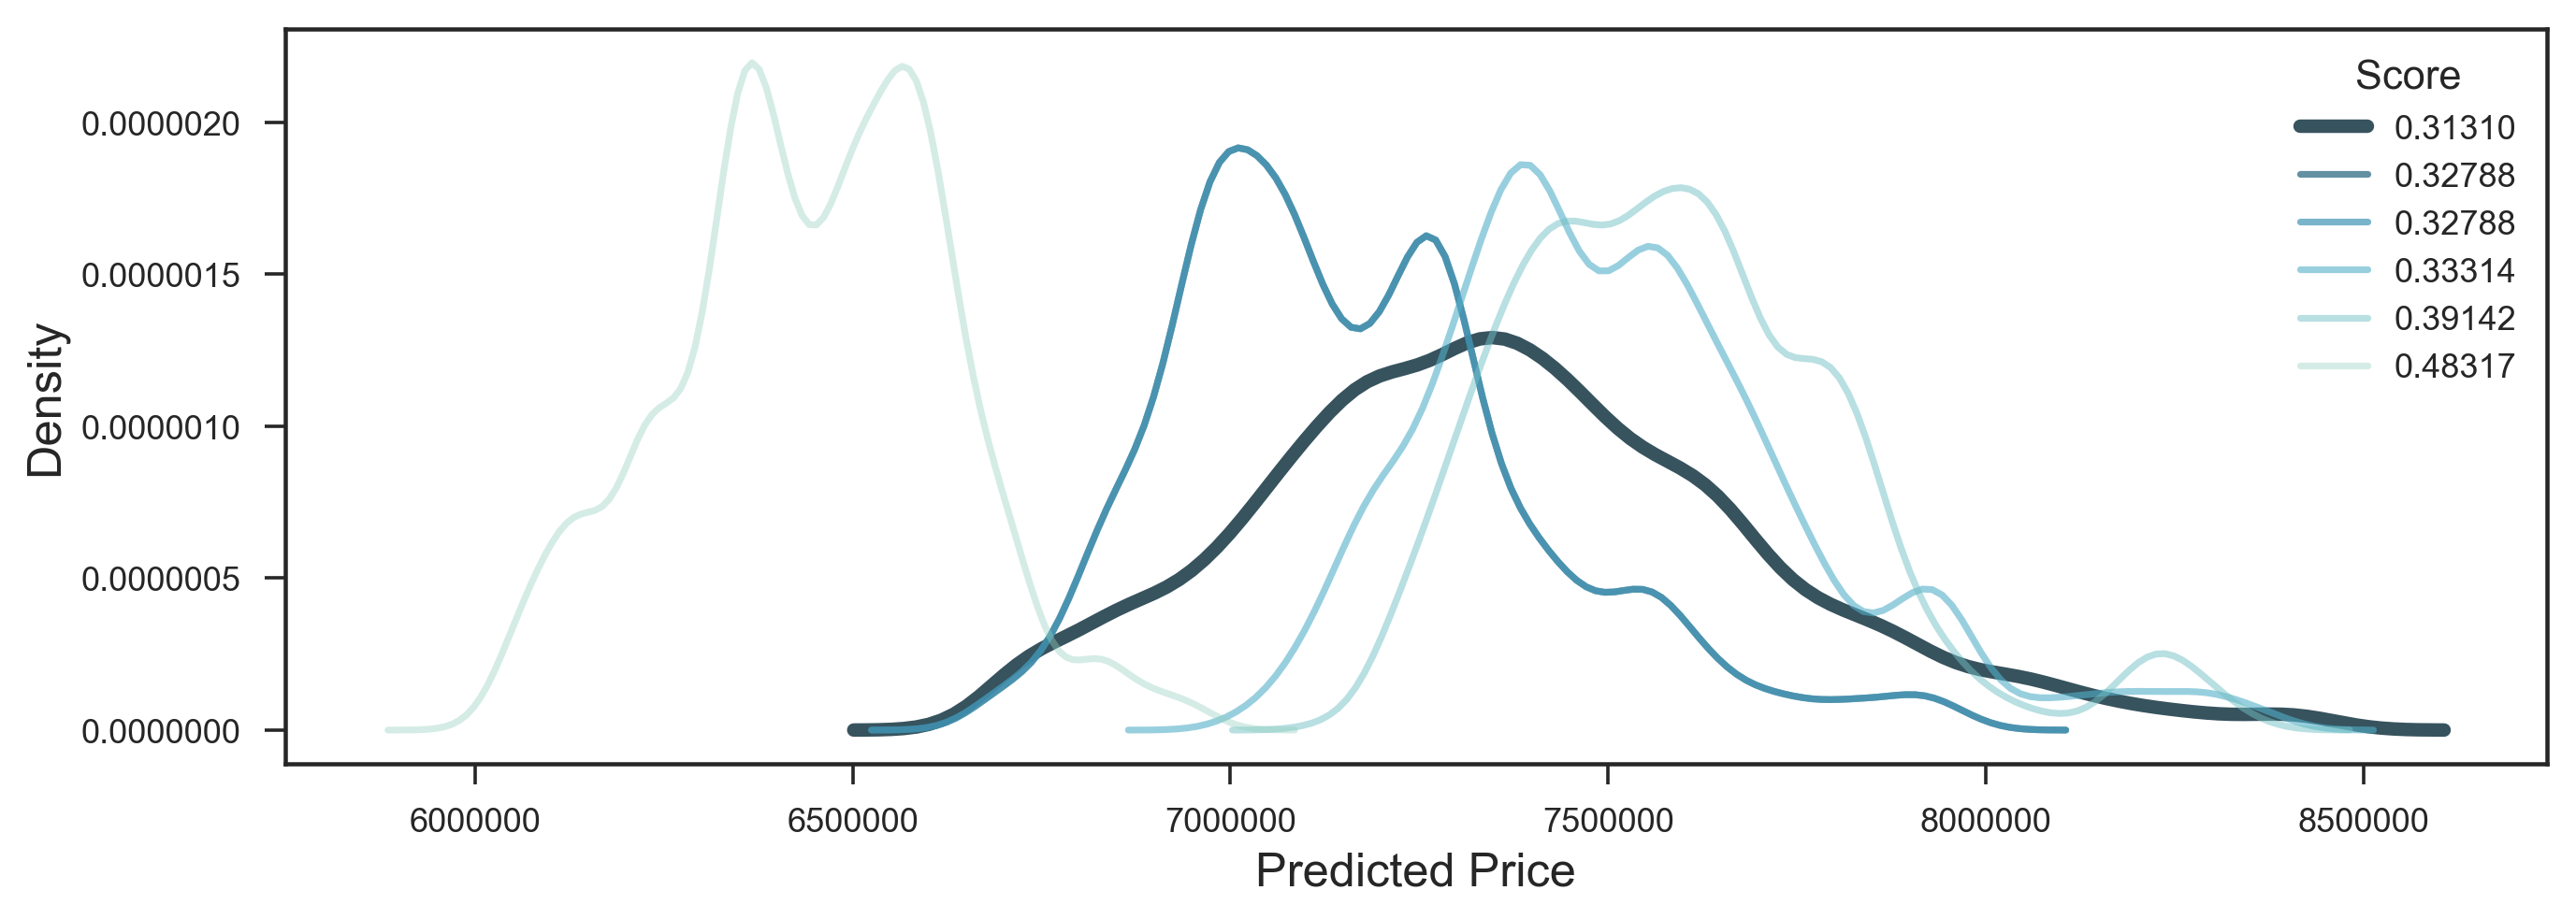

In [65]:
sns.set_palette("GnBu_d")
plt.rc('axes',edgecolor='#ebebeb',facecolor='#ebebeb')
plt.figure(figsize=(12,4),dpi=260,frameon=False)
sns.despine()
sns.set_style('ticks')
sns.kdeplot(df_31310['price_doc'].rolling(window=300).mean(), label='0.31310', lw=4)
sns.kdeplot(df_32788['price_doc'].rolling(window=300).mean(), label='0.32788', lw=2, alpha=0.8)
sns.kdeplot(df_32788['price_doc'].rolling(window=300).mean(), label='0.32788', lw=2, alpha=0.7)
sns.kdeplot(df_33314['price_doc'].rolling(window=300).mean(), label='0.33314', lw=2, alpha=0.6)
sns.kdeplot(df_39142['price_doc'].rolling(window=300).mean(), label='0.39142', lw=2, alpha=0.5)
sns.kdeplot(df_48317['price_doc'].rolling(window=300).mean(), label='0.48317', lw=2, alpha=0.4)
plt.xlabel('Predicted Price',size=14)
plt.ylabel('Density',size=14)
plt.legend(title='Score')
plt.show()
plt.savefig('../img/predictions.png')

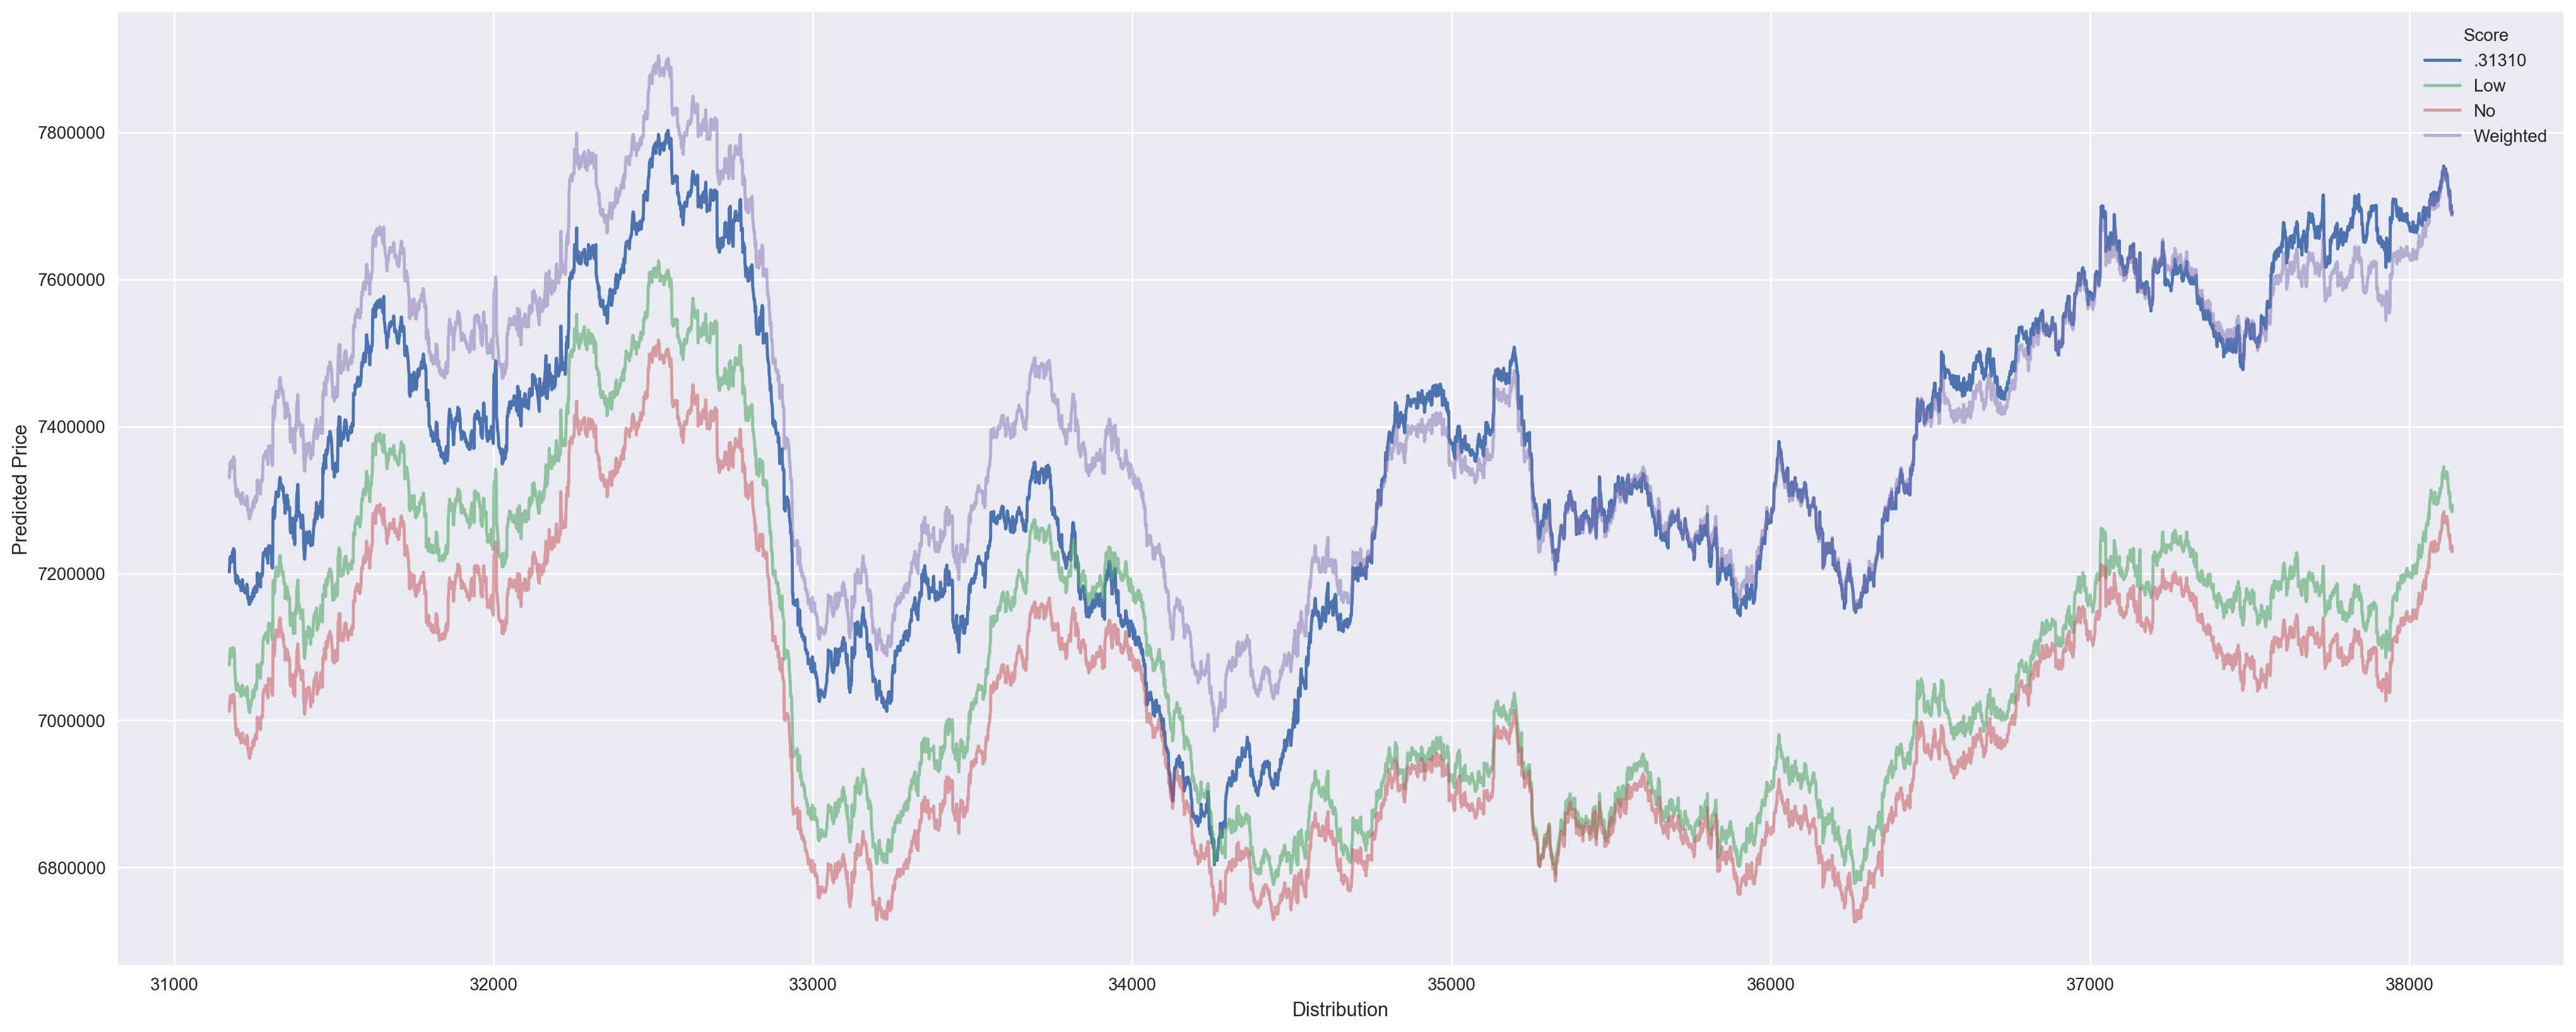

In [70]:
plt.figure(figsize=(25,10),dpi=200)
plt.plot(df_31310['price_doc'].rolling(window=700).mean(), label='.31310', alpha =1.0)
plt.plot(df['price_doc'].rolling(window=700).mean(), label='Low', alpha =0.6)
plt.plot(df['price_doc_no'].rolling(window=700).mean(), label='No', alpha =0.5)
plt.plot(weighted.rolling(window=700).mean(), label='Weighted', alpha =0.5)
plt.xlabel('Distribution')
plt.ylabel('Predicted Price')
plt.legend(title='Score')
plt.show()

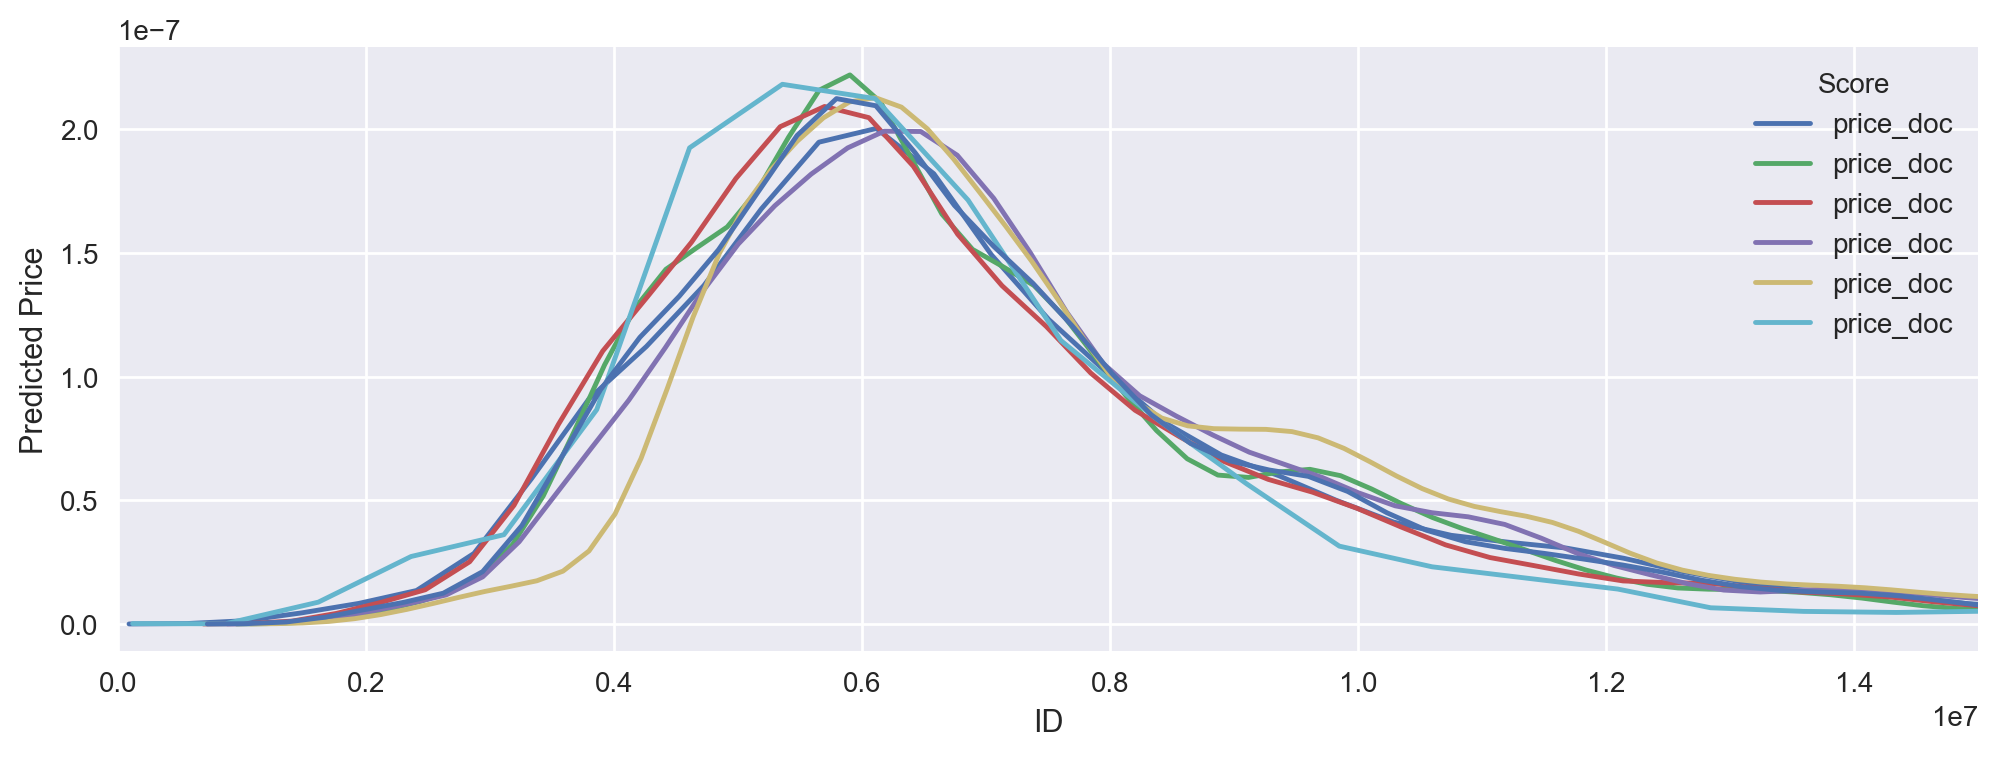

In [29]:
plt.figure(figsize=(12,4),dpi=200)
sns.kdeplot(df_31310['price_doc'])
sns.kdeplot(df_32788['price_doc'])
sns.kdeplot(df_33243['price_doc'])
sns.kdeplot(df_33314['price_doc'])
sns.kdeplot(df_39142['price_doc'])
sns.kdeplot(df_48317['price_doc'])
sns.kdeplot(y_test)
plt.xlabel('ID')
plt.ylabel('Predicted Price')
plt.xlim((0,1.5e7))
plt.legend(title='Score')
plt.show()

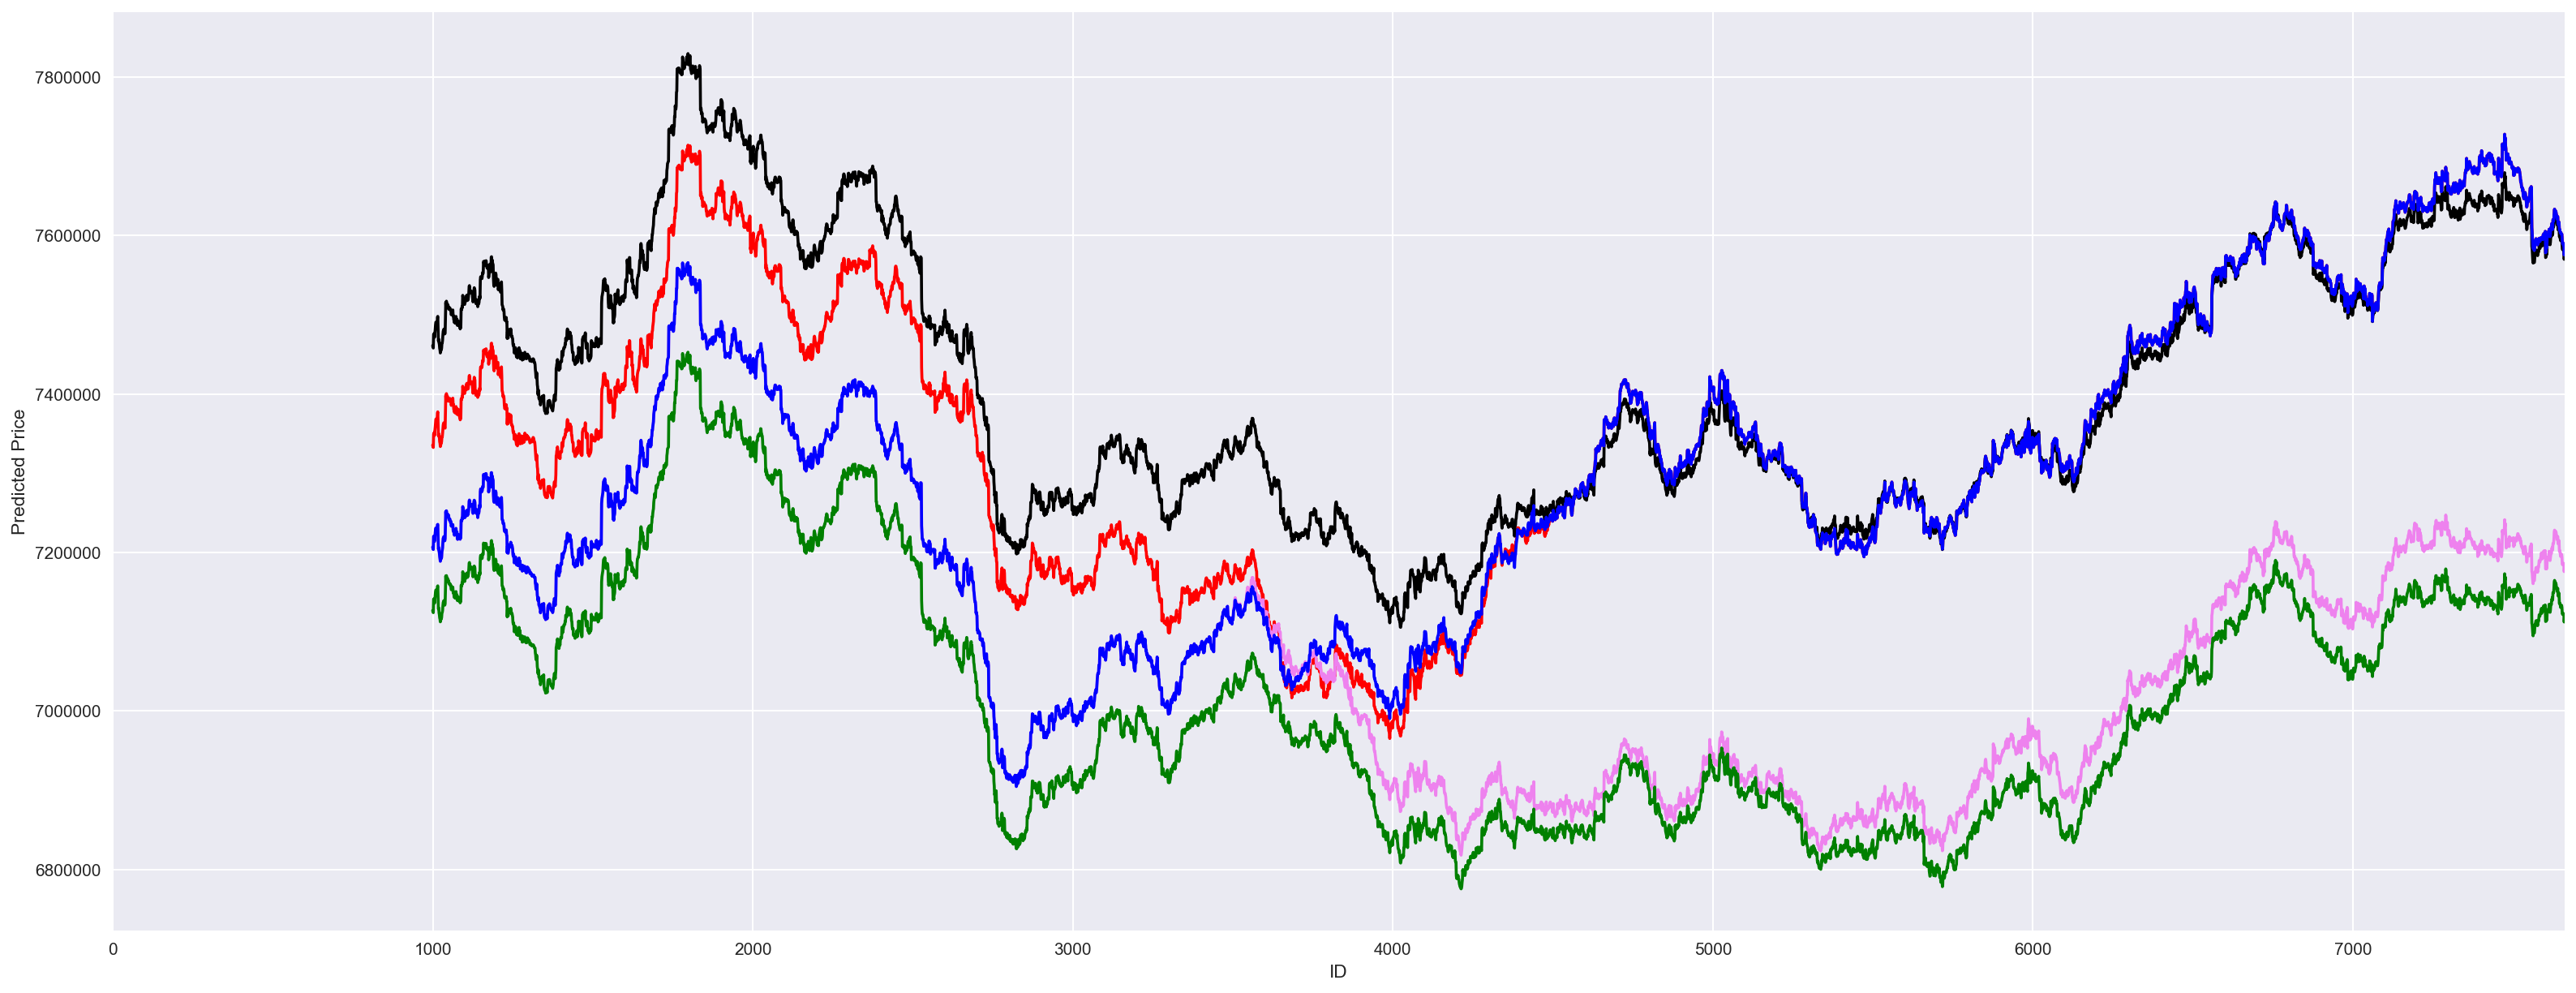

In [97]:
plt.figure(figsize=(26,10),dpi=150)
sns.tsplot(df_31310['price_doc'].rolling(window=1000).mean(), color='red')
sns.tsplot(df_low['price_doc'].rolling(window=1000).mean(),color='violet')
sns.tsplot(df_no['price_doc'].rolling(window=1000).mean(),color='green')
sns.tsplot(weighted.rolling(window=1000).mean(), color='black') 
sns.tsplot(df['price_doc'].rolling(window=1000).mean(), color='blue') 
plt.xlabel('ID')
plt.ylabel('Predicted Price')
plt.legend(title='Score')
plt.show()

In [99]:
sample['price_doc'] = weighted.values

In [100]:
sample.head(10)

,id,price_doc
0,30474,5.462246e+06
1,30475,8.714731e+06
2,30476,5.382791e+06
3,30477,6.067542e+06
4,30478,5.210148e+06
5,30479,1.009465e+07
6,30480,4.463463e+06
7,30481,4.376711e+06
8,30482,4.938670e+06
9,30483,5.074436e+06


In [75]:
sample.to_csv('./xgboost_weighted_final_053017.csv', index=False)